# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

The Data Science team performed an experiment to examine the impact of the new landing page in attracting new subscribers, randomly picking 100 users and splitting them evenly into two groups. The first group (control group) received the current landing page, while the second group (treatment group) received the new landing page. Data was collected on how people in both groups interacted with the two versions of the landing page.

To conduct a statistical analysis (at a significance level of 5%) to assess the efficiency of the new landing page in attracting new subscribers to the news land page by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?



### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [130]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [131]:
# read the data file
df = pd.read_csv("abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Viewing the first and last few rows of the dataset

In [132]:
# Viewing the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [133]:
# Viewing the last few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


Observasion:
- The DataFrame has 6 columns and each row corresponds to a user visiting the website.

### Checking the shape of the dataset

In [134]:
# Checking the shape of the dataset
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 100 rows and 6 columns.


### Checking the variables type

In [135]:
# Checking the variables types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observation:
There are 2 numerical columns in the data and 4 object type columns.

### Getting the statistical summary for the numerical variables

In [136]:
# Getting the statistical summary for the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


Observations:

- time_spent_on_the_page: in a random sample of 100 users, the mean time spent on the web page is 5.38  minutes with 2.38 minutes standard deviation.

- 50% of the users spent more than 5.42 minutes while 50% less than that.

- The lowest time spent on the page is only 0.19 minutes while the maximum time reach more than 10 minutes.


In [137]:
# Getting the statistical summary for the categorical variables
r = [1,2,4,5]
for i in r:
  print(df.iloc[:,i].value_counts())

control      50
treatment    50
Name: group, dtype: int64
old    50
new    50
Name: landing_page, dtype: int64
yes    54
no     46
Name: converted, dtype: int64
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


Observations:
- Group: A random sample of 100 users was taken and divided equally into two groups. The first group obtained the existing landing page (control group) and the second group obtained the new landing group (treatment).

- Landing_page: There are two versions of the landing page were collected: the old landing page (50) and the new landing page (50).

- Converted: 54 users get converted to a subscriber of the news portal while 46 did not.

- Language_prefered: 34 of the users chose Spanish to view the landing page while 34 chose French and English was chosen by 32 users.


### Check for missing values and duplicates

In [138]:
# Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

- There are no missing values

In [139]:
# Check for duplicates
no = len(df['user_id'].unique())
print ("There are {} different users.".format(no))

There are 100 different users.


### Univariate Analysis

#### Groups:

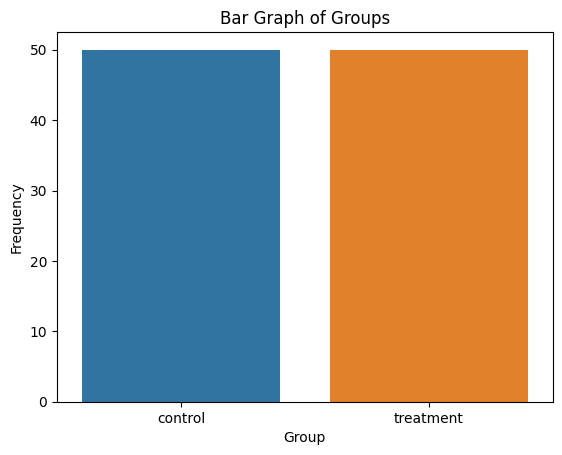

In [140]:
# Groups
df['group'].value_counts()
sns.countplot(data=df,x='group')
plt.title('Bar Graph of Groups')
plt.xlabel("Group")
plt.ylabel("Frequency")
plt.show()

Observation:
- From the bar graph: The landing page was served to the first group (control group) with 50 users and the new landing page to the second group (treatment group) with 50 users too.

#### Landing_page:

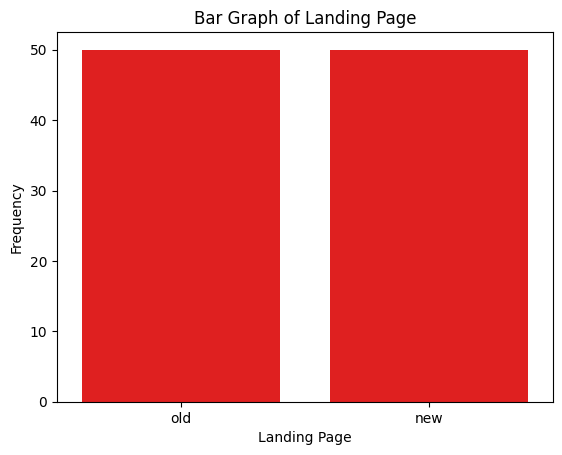

In [141]:
# Landing
df['landing_page'].value_counts()
sns.countplot(data=df,x='landing_page', color='red')
plt.title('Bar Graph of Landing Page')
plt.xlabel("Landing Page")
plt.ylabel("Frequency")
plt.show()

Observation:

-From the bar graph: There are two equal type of landing pages the existing landing page and the new landing page.

#### Converted:

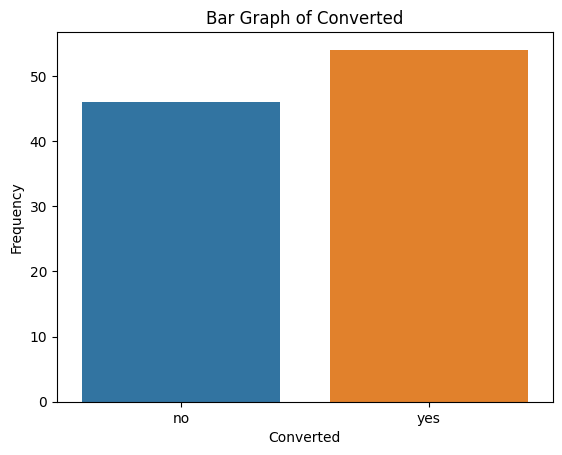

In [142]:
# converted
df['converted'].value_counts()
sns.countplot(data=df,x='converted')
plt.title('Bar Graph of Converted')
plt.xlabel("Converted")
plt.ylabel("Frequency")
plt.show()

Observation:

- From the bar graph: There are 56 users were converted to subscribers of the news portal and 46 did not.

#### Language preffered:

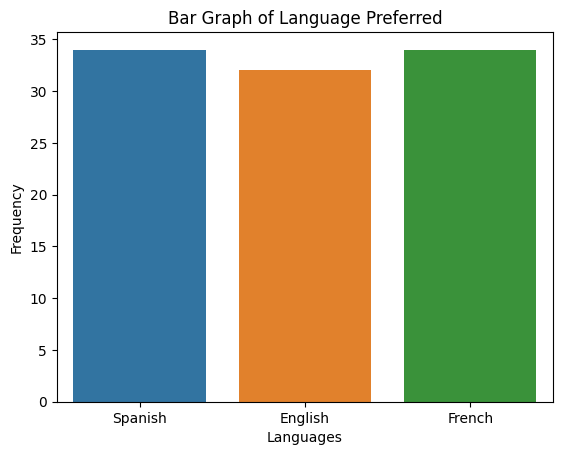

In [143]:
# Language Prefered
df['language_preferred'].value_counts()
sns.countplot(data=df,x='language_preferred')
plt.title('Bar Graph of Language Preferred')
plt.xlabel("Languages")
plt.ylabel("Frequency")
plt.show()

Observation:

- From the bar graph: 34 of the users chose Spanish to view the landing page while 34 chose French and English was chosen by 32 users.


#### Time_spent_on_the_page

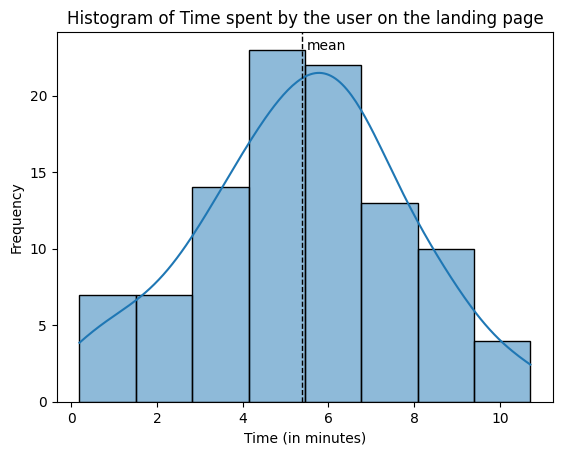

In [144]:
# time_spent_on_the_page
sns.histplot(data = df, x = 'time_spent_on_the_page', kde=True)
plt.axvline(df['time_spent_on_the_page'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.annotate('mean', (5.5, 23))
plt.title("Histogram of Time spent by the user on the landing page")
plt.xlabel("Time (in minutes)")
plt.ylabel("Frequency")
plt.show()

Observation:

- From the histogram: the distribution of time has a single peak in the middle with no skew. The distribution is symmetric around the mean which indicates that the distribution of time is Normal distribution.   

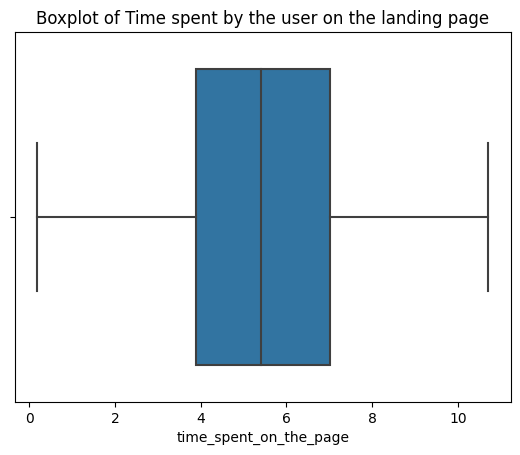

In [145]:
sns.boxplot(data = df, x = 'time_spent_on_the_page')
plt.title("Boxplot of Time spent by the user on the landing page")
plt.show()

Observation:

- From the boxplot 50% of the users spent less than median= 5.4 minutes on the land page while 50% spent more than 5.4 minutes. The median is located in the middle and the whisker has the same size which indicates that the distribution of time is symmetric.

### Bivariate Analysis

#### Landing page vs Time spent on the page

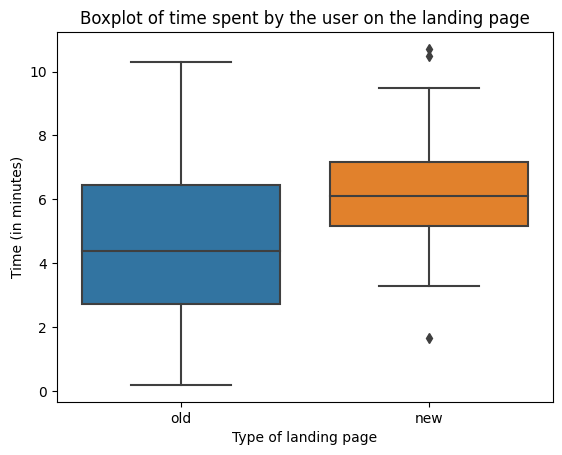

In [146]:
# Landing page vs Time spent on the page
sns.boxplot(data = df,x = 'landing_page', y = 'time_spent_on_the_page')
plt.title("Boxplot of time spent by the user on the landing page")
plt.xlabel("Type of landing page")
plt.ylabel("Time (in minutes)")
plt.show()

Observations:

From the boxplot of the time spent by users on the old and new landing pages:

- The median of the time spent on the new page is greater than that on the old page.

- The interquartile range and the range of the time is smaller for the new page though the time spent on the new pages which shows outliers on both sides.

- Both data distributions seem to be symmetric since in both of them the median is located in the middle of the box and the whiskers have the same length.

In [147]:
print('The sample mean of the time spent on the old page is:',round(df['time_spent_on_the_page'][df['landing_page'] == 'old'].mean(),2),'with standard deviation',round(df['time_spent_on_the_page'][df['landing_page'] == 'old'].std(),2))
print('The sample mean of the time spent on the new page is:',round(df['time_spent_on_the_page'][df['landing_page'] == 'new'].mean(),2),'with standard deviation',round(df['time_spent_on_the_page'][df['landing_page'] == 'new'].std(),2))

The sample mean of the time spent on the old page is: 4.53 with standard deviation 2.58
The sample mean of the time spent on the new page is: 6.22 with standard deviation 1.82


### Conversion vs Time spent on the page

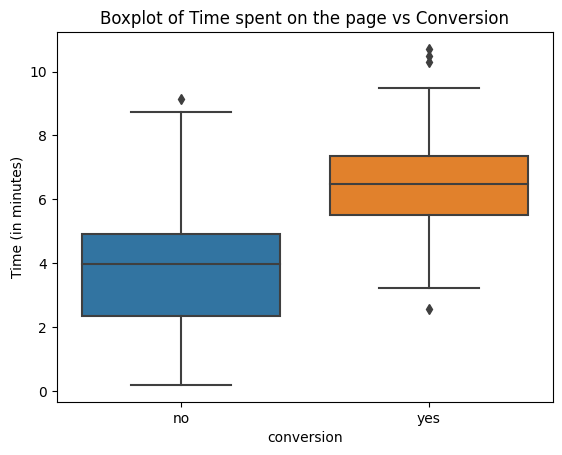

In [148]:
sns.boxplot(data = df,x = 'converted', y = 'time_spent_on_the_page')
plt.title("Boxplot of Time spent on the page vs Conversion")
plt.xlabel("conversion")
plt.ylabel("Time (in minutes)")
plt.show()

Observations:

From the boxplot of the time spent by users vs conversion:

- Those who converted to a subscriber spent more time on the page (median greater than 6 min) than who did not converted (median = 4 min).

- Both data distributions seem to be skewed to the right because of the large outliers.

### Language preferred vs Time spent on the page

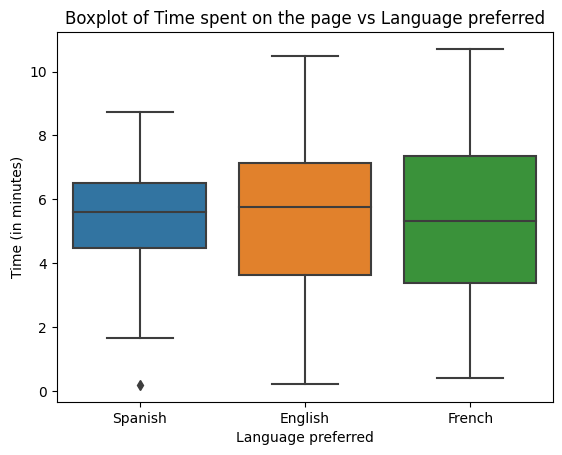

In [149]:
sns.boxplot(data = df,x = 'language_preferred', y = 'time_spent_on_the_page')
plt.title("Boxplot of Time spent on the page vs Language preferred")
plt.xlabel("Language preferred")
plt.ylabel("Time (in minutes)")
plt.show()

Observations:

From the boxplot of the time spent by users vs conversion:

- The time spent on the page for the three preferred languages (English, Spanish, French) is very similar.

- The data distributions for the three languages seem to be symmetric with a small outlier for Spanish.

### Relationship between conversion status, preferred language, and landing page

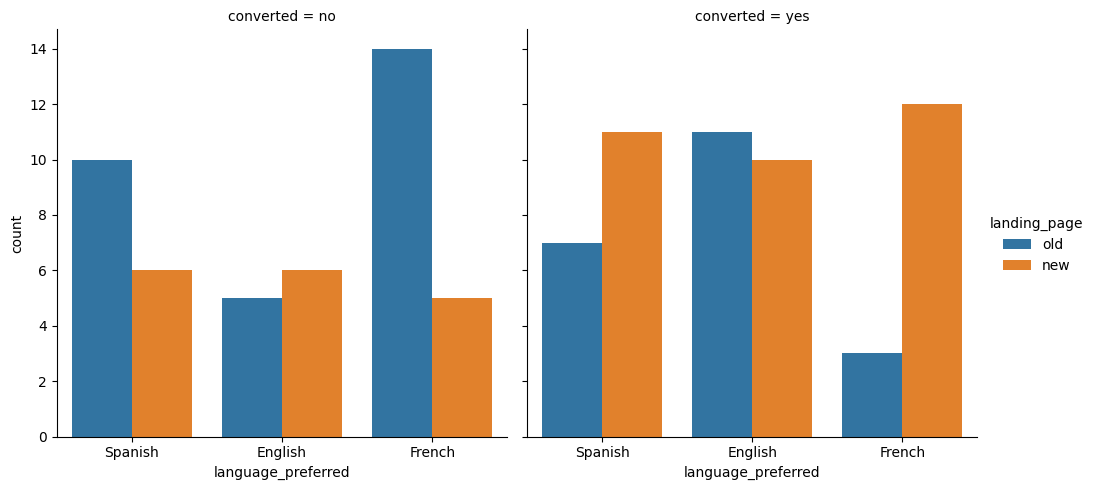

In [150]:
sns.catplot(data = df, x = 'language_preferred', hue = 'landing_page', col = 'converted', kind = 'count');

Observations:

- From the first graph, for the preferred languages (Spanish and French), The number of users who did not convert to subscribers when viewing the old landing page is greater than those who viewed the new page. In English, the difference between them is not big.

- From the second graph, for the preferred languages (Spanish and French), The number of users who converted to subscribers when viewing the new landing page is greater than those who viewed the old page. In English, the difference between them is not big.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

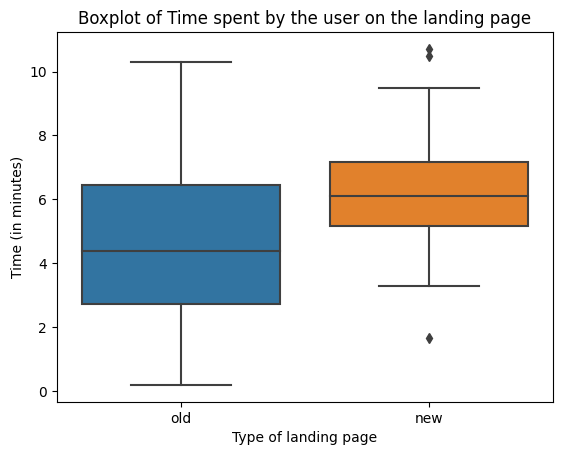

In [151]:
# Landing page vs Time spent on the page
sns.boxplot(data = df,x = 'landing_page', y = 'time_spent_on_the_page')
plt.title("Boxplot of Time spent by the user on the landing page")
plt.xlabel("Type of landing page")
plt.ylabel("Time (in minutes)")
plt.show()

Observations:

From the boxplot of the time spent by users on the old and new landing pages:

- The median of the time spent on the new page is greater than that on the old page.

- The interquartile range and the range of the time is smaller for the new page though the time spent on the new pages shows outliers on both sides.

- Both data distributions seem to be symmetric since in both of them the median is located in the middle of the box and the whiskers have the same length.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean of the time spent by the users on the new landing page (new) is equal to the mean of time spent by the users on the old landing page (old). <br>
$H_a:$ The mean of the time spent by the users on the new landing page (new) is greater than the mean of time spent by the users on the old landing page (old).

Let $\mu_n$ and $\mu_o$ be the mean of time spent by the useres on the new landing page and the mean of time spent by the useres on the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:
> $H_0: \mu_n = \mu_o $ <br> $H_a: \mu_n > \mu_o $

### Step 2: Select Appropriate test

This is a case of a right-tailed test for comparing the means from two different population with unkown standard deviations. Therefore, we will use two-sample independent t-test.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

#### Assumptions of two-sample independent ttest:

##### Assumption One: Normality test:


According to the Central Limit Therom, If the sample size increases, the distribution of the sample means tend to become a normal distribution curve.
100 users are randomly selected and divided to two groups with size 50 (large sample) which indecate that the CLT condition is met. Thus, the distribution is Normal Distribution.

##### Assumption Two : Equality of variance:

Let $\sigma^2_n$ and $\sigma^2_o$ be the variance of time spent by the users on the new landing page and the variance of time spent by the users on the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:
> $H_0: \sigma^2_n = \sigma^2_o $ <br>
>$H_a: \sigma^2_n \neq \sigma^2_o $

In [152]:
from scipy.stats import f
def f_test(x,y):
  x = np.array(x)
  y = np.array(y)
  test = np.var(x,ddof=1)/np.var(y,ddof=1)
  dfx = x.size-1
  dfy = y.size-1
  p = (1-f.cdf(test,dfx,dfy))
  p2 = p*2
  return(print('The p_value of equality of variance test is {}'.format(round(p2,6))))
print('The sample variance of the time spent on the old page is:',round(df['time_spent_on_the_page'][df['landing_page'] == 'old'].var(),4))
print('The sample variance of the time spent on the new page is:',round(df['time_spent_on_the_page'][df['landing_page'] == 'new'].var(),4))
f_test(df['time_spent_on_the_page'][df['landing_page'] == 'old'], df['time_spent_on_the_page'][df['landing_page'] == 'new'])

The sample variance of the time spent on the old page is: 6.6666
The sample variance of the time spent on the new page is: 3.3016
The p_value of equality of variance test is 0.015411


Since the p-value=0.015411 is smaller than the level of significance α = 0.05,  then we should reject the null hypothesis H0. The decision is the variance of the two population are not equal so we should use two independent ttest for unequal variance.

### Step 5: Calculate the p-value

In [153]:
# ttest equality of means (unequal sdv)
from scipy.stats import ttest_ind
test, p_value = ttest_ind(df['time_spent_on_the_page'][df['landing_page'] == 'new'],
                          df['time_spent_on_the_page'][df['landing_page'] == 'old'],
                          equal_var = False,
                          alternative = 'greater')
print('The test value is {} and the P_value is {}'.format(test,p_value))

The test value is 3.7867702694199856 and the P_value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$





In [154]:
# print the conclusion based on p-value
if p_value < 0.05:
    print('Since the p-value {} is less than the level of significance, we reject the null hypothesis.'.format(p_value))
else:
    print('Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.'.format(pvalue))

Since the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to support the claim that the users spend more time on the new landing page than on the existing landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

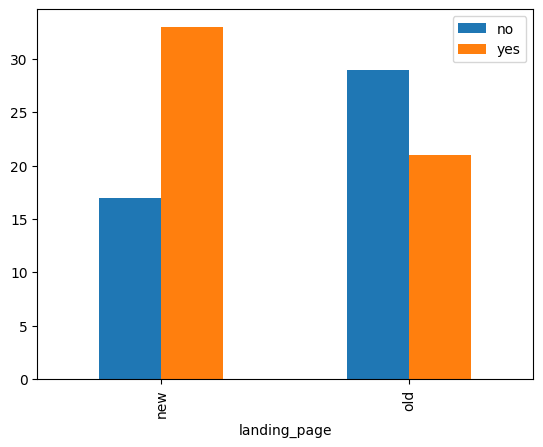

In [155]:
pd.crosstab(df['landing_page'],df['converted']).plot(kind='bar')
plt.legend()
plt.show()

Observations:

From the bar chart:

- the new landing page was served to 50 users, about 33 of them converted while the existing landing page was served to 50 users only 21 of them converted.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$  The conversion rate (the proportion of users who visit the landing page and get converted) for the new page equal to the conversion rate for the old page.
<br>
>$H_a:$  The conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page.

Let $P_n$ and $P_o$ be the the conversion rate for the new page and the conversion rate for the old page respectively.

Mathematically, the above formulated hypotheses can be written as:
>$H_0: P_n = P_o $ <br>
>$H_a: P_n > P_o $

### Step 2: Select Appropriate test

This is a case of a right-tailed test for comparing the proportion from two different population.Therefore, we will use two-proportion Z-test.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [156]:
oldpage_converted = len(df[(df['converted']== 'yes') & (df['landing_page'] == 'old')])
newpage_converted = len(df[(df['converted']== 'yes') & (df['landing_page'] == 'new')])

oldpage_count = len(df[df['landing_page'] == 'old'])
newpage_count = len(df[df['landing_page'] == 'new'])

newpage_proportion = newpage_converted / newpage_count
oldpage_proprtion = oldpage_converted / oldpage_count

print('The conversion rate for the old page is {0} and the conversion rate for the new page is {1}'.format(oldpage_proprtion, newpage_proportion ))

The conversion rate for the old page is 0.42 and the conversion rate for the new page is 0.66


All the assumptions for ztest for two proportion are met
1. The samples must be random samples.
2. The sample data are independent of one another.
3. For both samples np >= 10 and nq >= 10.

### Step 5: Calculate the p-value

In [157]:
from statsmodels.stats.proportion import proportions_ztest
test, p_value = proportions_ztest([newpage_converted,oldpage_converted],[newpage_count,oldpage_count])
print('The test value is {} and the P_value is {}'.format(test,p_value))

The test value is 2.4077170617153842 and the P_value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [158]:
# print the conclusion based on p-value
if p_value < 0.05:
    print('Since the p-value {} is less than the level of significance, we reject the null hypothesis.'.format(p_value))
else:
    print('Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.'.format(p_value))

Since the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is less than the significance level 0.05, we have enough statistical evidence to reject the null hypothesis. Thus, the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

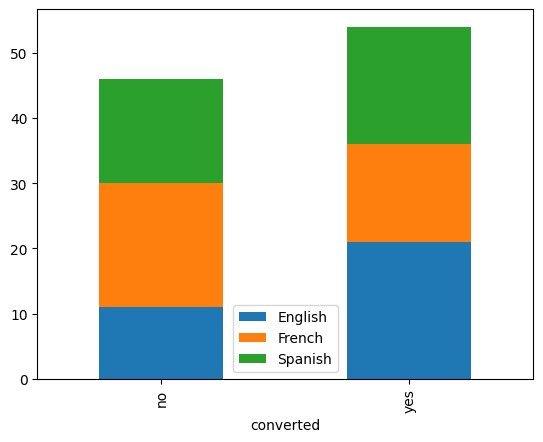

In [159]:
pd.crosstab(df['converted'],df['language_preferred']).plot(kind='bar',stacked=True)
plt.legend()
plt.show()

Obeservations:

From the stacked bar chart:

- The number of users who preferred Spanish language and converted is similar to the number of users who did not convert. In French language, the number of users who converted is larger than who did not. In contrast, the number of users who did not convert and preffered English is larger.

### Step 1: Define the null and alternate hypotheses


>$H_0:$ The conversion and preferred language are independent.

>$H_a:$ The conversion and preferred language are not independent.

### Step 2: Select Appropriate test

We have independence test for two categorical variables. Then, we should use chi square for independence.

### Step 3: Decide the significance level

As given in the problem statement, we select  α=0.05 .

### Step 4: Collect and prepare data

In [160]:
table = pd.crosstab(df['converted'],df['language_preferred'])
table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


All the assumptions for chi square for independence are met
1. The data are obtained from random samples.
2. The number of observations in each level is greater than 5.

### Step 5: Calculate the p-value

In [161]:
from scipy.stats import chi2_contingency
test, pvalue, dof, expected = chi2_contingency(table)
print('The test value is {} and the P_value is {}'.format(test,pvalue))

The test value is 3.0930306905370837 and the P_value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$


In [162]:
# print the conclusion based on p-value
if pvalue < 0.05:
    print('Since the p-value {} is less than the level of significance, we reject the null hypothesis.'.format(pvalue))
else:
    print('Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.'.format(pvalue))

Since the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is greater than the significance level 0.05, we dont have enough statistical evidence to reject the null hypothesis. Thus, the conversion and preferred language are independent

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

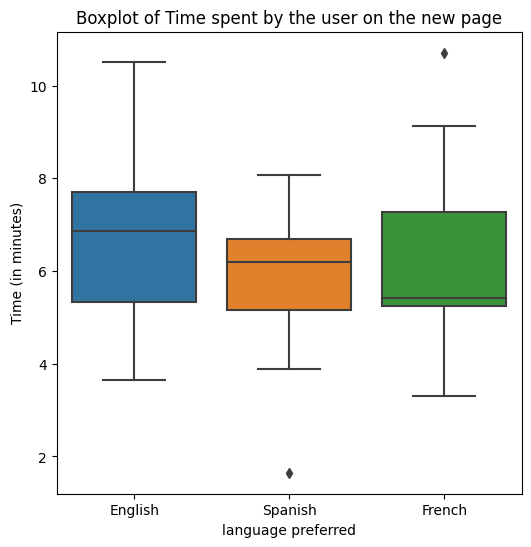

In [163]:
# Language vs Time spent on the page
new = df[df['landing_page'] == 'new']
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data = new, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.title("Boxplot of Time spent by the user on the new page")
plt.xlabel("language preferred")
plt.ylabel("Time (in minutes)")
plt.show()

Observations:

From the boxplot of the time spent by users on the new landing pages for the different languages:

- The median of the time spent on the new page has the greatest value for the English users (about 7 min), and around 6 min for French users while the lowest value 5 min for Spanish.

- The interquartile range of the time for English is about 7 min and for Spanish is around 6 min while the French is less than 6 min.

- Data distributions for English and French seem to be skewed to the right and the french has a large outliers, while the distribution of Spanish seem to be skewed to the left and there are small outliers.

### Step 1: Define the null and alternate hypotheses


Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent on the new page for the different language users English, Spanish, and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one means of the time spent on the new page is different from the rest.

### Step 2: Select Appropriate test

we need to compare means of three groups therefore we select ANOVA test.

### Step 3: Decide the significance level

As given in the problem statement, we select  α=0.05 .

### Step 4: Collect and prepare data

In [164]:
print(new.groupby("language_preferred")['time_spent_on_the_page'].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


#### ANOVA Assumptions:

##### Assumption 1: Normality


>$H_0$: the data from normal distribution.

>$H_a$: that is not true

In [165]:
# Shapiro Test
from scipy import stats
test, pvalue = stats.shapiro(new['time_spent_on_the_page'])
print('The test value is {} and the P_value is {}'.format(test,pvalue))

The test value is 0.9857664704322815 and the P_value is 0.8040016293525696


- Since the P_value is greater than the significance level 0.05 and we did not reject $H_0$ then, the normality assumption is met

##### Assumption 2: Homogenity:

Let $\sigma^2_1$ and $\sigma^2_2$ and $\sigma^2_3$ be the variance of the time spent on the new page for the different language users English, Spanish, and French respectively.

Mathematically, the above formulated hypotheses can be written as:
>$H_0: \sigma^2_1 = \sigma^2_2 = \sigma^2_3$ <br>
>$H_a: \sigma^2_1 \neq \sigma^2_2 \neq \sigma^2_3$

In [166]:
# Levene's Test
from scipy.stats import levene
stat, pvalue = levene(new['time_spent_on_the_page'][new['language_preferred']=='English'],
                      new['time_spent_on_the_page'][new['language_preferred']=='Spanish'],
                      new['time_spent_on_the_page'][new['language_preferred']=='French'])
print('The test value is {} and the P_value is {}'.format(test,pvalue))

The test value is 0.9857664704322815 and the P_value is 0.46711357711340173


- Since the P_value is greater than the significance level 0.05 and we did not reject $H_0$ then, the equal variance assumption is met

### Step 5: Calculate the p-value

In [167]:
from scipy.stats import f_oneway
stat, pvalue = f_oneway(new.loc[new['language_preferred'] == 'English','time_spent_on_the_page'],
                        new.loc[new['language_preferred'] == 'Spanish','time_spent_on_the_page'],
                        new.loc[new['language_preferred'] == 'French','time_spent_on_the_page'])
print('The test value is {} and the P_value is {}'.format(test,pvalue))

The test value is 0.9857664704322815 and the P_value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [168]:
if pvalue < 0.05:
    print('Since the p-value {} is less than the level of significance, we reject the null hypothesis.'.format(pvalue))
else:
    print('Since the p-value {} is greater than the level of significance, we fail to reject the null hypothesis.'.format(pvalue))

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference
As the p-value is greater than the significance level 0.05, we dont have enough statistical evidence to reject the null hypothesis. Thus, there is no significant difference between the time spent on the new page for the different language users.

## Conclusion and Business Recommendations



-  To answer the question if the users spend more time on the new landing page than the existing landing page, two-sample independent t-test was performed. At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to support the claim that the users spend more time on the new landing page than on the existing landing page.

-  To answer the question if the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page, a two-proportion z-test was performed. As the p-value is less than the significance level 0.05, we have enough statistical evidence to reject the null hypothesis. Thus, the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.

- To answer the question if the conversion and preferred language are independent or related, a chi-square test for independence was performed. As the p-value is greater than the significance level 0.05, we dont have enough statistical evidence to reject the null hypothesis. Thus, the conversion and preferred language are independent.

- To answer the question if the time spent on the new page same for the different language users,  a one-way ANOVA test was performed. As the p-value is greater than the significance level 0.05, we dont have enough statistical evidence to reject the null hypothesis. Thus, there is no significant difference between the time spent on the new page for the different language users.

Recommedations:

- The current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe. In conclusion, The results of the analysis support the executives opinion that the new landing page is more effective in gathering new subscribers for the news portal and the conversion rate to subscribers will be similar throughout the different languages.


___